# Project Title : Recommendation System Project

## Name : Omar Mahmoud Abdel Rahman    
## Date : 10/5/2024

Certainly! Let's outline the steps for creating a music recommendation system similar to Spotify's, but using a different technique:

1. **Data Collection**: Gather user data including song listening history, timestamps, and any relevant metadata about the songs (e.g., genre, artist, album).

2. **Feature Engineering**: Extract meaningful features from the collected data. This could involve techniques such as:
   - **Collaborative Filtering**: Analyzing user behavior and preferences to identify similarities between users or items.
   - **Content-Based Filtering**: Using characteristics of the songs themselves (e.g., genre, tempo, artist) to recommend similar items to what the user has previously liked.
   - **Matrix Factorization**: Decomposing the user-item interaction matrix to identify latent factors that represent user preferences and item characteristics.

3. **Data Preprocessing**: Prepare the data for modeling by handling missing values, scaling features, and encoding categorical variables if necessary.

4. **Model Selection**: Choose an appropriate machine learning technique for recommendation, such as:
   - **Neural Collaborative Filtering**: Using neural networks to learn user-item interactions and make recommendations.
   - **Decision Trees or Random Forests**: Building a model based on decision trees to predict user preferences.
   - **Gradient Boosting Machines**: Ensemble learning techniques that build multiple weak models to make accurate predictions.

5. **Model Training**: Train the selected model using the prepared data. This involves optimizing model parameters to minimize prediction errors.

6. **Evaluation**: Assess the performance of the trained model using evaluation metrics such as accuracy, precision, recall, or mean squared error, depending on the specific recommendation task.

7. **Hyperparameter Tuning**: Fine-tune the model hyperparameters to improve its performance further. This could involve techniques such as grid search or random search.

8. **Validation**: Validate the model's performance on unseen data to ensure its generalization ability.


9. **Deployment**: Integrate the trained model into a recommendation system framework that can generate personalized recommendations in real-time based on user input.

10. **Feedback Mechanism**: Incorporate a feedback loop where user interactions with recommended songs are collected and used to update the recommendation model periodically. This helps improve the relevance and accuracy of future recommendations.

11. **Monitoring and Maintenance**: Continuously monitor the recommendation system's performance and update the model as needed to adapt to changing user preferences and behavior.

By following these steps and utilizing a different technique than Spotify's, you can develop a music recommendation system tailored to your specific requirements and preferences.

#### We are going to build a Music Recommondation system in this project, as we know there are several techniques used to do Recommondation,

#### in this notebook we are going to track the client/user 's history and the most repeated tracks to generate a recommondation music for them
#### there are several techniques to do so like : 
1. Collaborative Recommondation Technique
2. Content-based Recommendation Technique

In [87]:
# Importing needed dependencies
import pandas as pd
import numpy as np
import json
import re
import sys
import itertools

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# 1 Data Installation and Preparation

### 1.1 Data installtion
- pathes to data, songs info 
- reading them using pandas read csv file

In [2]:
user_path = 'D:/courses/DS&ML Course/AlphaCode_Intern/User Listening History.csv'
songs_path = 'D:/courses/DS&ML Course/AlphaCode_Intern/Music Info.csv'

user_history_df = pd.read_csv(user_path)
songs_content_df = pd.read_csv(songs_path)

### 1.2 Data preparetion and EDA
1. dataframes describtion
2. dataframes info
3. dropping unneeded rows like `['spotify_id', 'spotify_url']` 
4. changing some feature like tags into lists because we are going to iterate on it later
5. seeing mean, median 
6. see if there is any outliers, null values, duplicates if there is any of them lets see how could we deal with them according to it number

In [3]:
user_history_df.head()

,track_id,user_id,playcount
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1


In [4]:
songs_content_df.head()

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,...,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,...,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4


In [5]:
songs_content_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50683 entries, 0 to 50682
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_id             50683 non-null  object 
 1   name                 50683 non-null  object 
 2   artist               50683 non-null  object 
 3   spotify_preview_url  50683 non-null  object 
 4   spotify_id           50683 non-null  object 
 5   tags                 49556 non-null  object 
 6   genre                22348 non-null  object 
 7   year                 50683 non-null  int64  
 8   duration_ms          50683 non-null  int64  
 9   danceability         50683 non-null  float64
 10  energy               50683 non-null  float64
 11  key                  50683 non-null  int64  
 12  loudness             50683 non-null  float64
 13  mode                 50683 non-null  int64  
 14  speechiness          50683 non-null  float64
 15  acousticness         50683 non-null 

- we can notice that the `genre` has alot of null values so we can also drop it and use the information from the `tags` field

In [6]:
user_history_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9711301 entries, 0 to 9711300
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   track_id   object
 1   user_id    object
 2   playcount  int64 
dtypes: int64(1), object(2)
memory usage: 222.3+ MB


### after using the describe function we can notice that the `loundnees` field might have some outliers because the mean is too small according to the maximum value other than this the data looks just fine

In [7]:
# Printing Out the songs_content_df describtion
songs_content_df.describe()

,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,50683.000000,5.068300e+04,50683.000000,50683.000000,50683.000000,50683.000000,50683.000000,50683.000000,50683.000000,50683.000000,50683.000000,50683.000000,50683.000000,50683.000000
mean,2004.017323,2.511551e+05,0.493537,0.686486,5.312748,-8.291204,0.631060,0.076023,0.213808,0.225283,0.215425,0.433134,123.507682,3.898151
std,8.860172,1.075860e+05,0.178838,0.251808,3.568078,4.548365,0.482522,0.076007,0.302848,0.337049,0.184697,0.258779,29.621125,0.419670
min,1900.000000,1.439000e+03,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2001.000000,1.927330e+05,0.364000,0.514000,2.000000,-10.375000,0.000000,0.035200,0.001400,0.000018,0.098400,0.214000,100.683000,4.000000
50%,2006.000000,2.349330e+05,0.497000,0.744000,5.000000,-7.200000,1.000000,0.048200,0.039900,0.005630,0.138000,0.405000,121.989000,4.000000
75%,2009.000000,2.881930e+05,0.621000,0.905000,9.000000,-5.089000,1.000000,0.083500,0.340000,0.441000,0.289000,0.634000,141.639000,4.000000
max,2022.000000,3.816373e+06,0.986000,1.000000,11.000000,3.642000,1.000000,0.954000,0.996000,0.999000,0.999000,0.993000,238.895000,5.000000


In [8]:
float_cols = songs_content_df.dtypes[songs_content_df.dtypes == 'float64'].index.values

float_cols

array(['danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype=object)

In [9]:
# Dropping unneeded columns
songs_content_df.drop(['spotify_preview_url', 'spotify_id', 'genre'],axis = 1, inplace = True)

In [10]:
songs_content_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50683 entries, 0 to 50682
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          50683 non-null  object 
 1   name              50683 non-null  object 
 2   artist            50683 non-null  object 
 3   tags              49556 non-null  object 
 4   year              50683 non-null  int64  
 5   duration_ms       50683 non-null  int64  
 6   danceability      50683 non-null  float64
 7   energy            50683 non-null  float64
 8   key               50683 non-null  int64  
 9   loudness          50683 non-null  float64
 10  mode              50683 non-null  int64  
 11  speechiness       50683 non-null  float64
 12  acousticness      50683 non-null  float64
 13  instrumentalness  50683 non-null  float64
 14  liveness          50683 non-null  float64
 15  valence           50683 non-null  float64
 16  tempo             50683 non-null  float6

In [11]:
list(songs_content_df['tags'][3].split(','))[0]

'rock'

In [12]:
# we can now convert the tags field into list so we can use Tf-id later
songs_content_df['tags'] = songs_content_df['tags'].apply(lambda x : list(str(x).split(',')))


In [22]:
songs_content_df['tags'].head()

0    [rock, alternative, indie, alternative_rock, i...
1    [rock, alternative, indie, pop, alternative_ro...
2    [rock, alternative, alternative_rock, 90s, gru...
3    [rock, alternative, indie, alternative_rock, i...
4    [rock, alternative, indie, alternative_rock, i...
Name: tags, dtype: object

In [14]:
def clear_spaces(x):
    ls = []
    for item in x:
        ls.append(item.strip())
    return ls

In [15]:
songs_content_df['tags'] = songs_content_df['tags'].apply(clear_spaces)

In [16]:
# dropping duplicates
print(len(songs_content_df['tags']))
songs_content_df['tags'].drop_duplicates(inplace = True)
print(len(songs_content_df['tags']))

50683
50683


### 2.Feature Engineering
- **2.1 Create Song_Featue_Data_Frame**
    - **2.1.1 Normalize float variables**
    - **2.1.2 OHE Year and Popularity Variables**
    - **2.1.3 Create TF-IDF features off of artist genres**
- **2.2 Create User-Item Matrix and predict for each user the songs that he will probably repeated within a month**
    - **2.2.1 Find a good number of n_components that best describe the accumilitve variance for the features**
    - **2.2.2 Train a TruncatedSVD and fit it to the User-Item Matrix**
    - **2.2.3 obtain the top 200 unlistened songs for a random user**


In [17]:
def ohe_prep(df, column, new_name): 
    """ 
    Create One Hot Encoded features of a specific column

    Parameters: 
        df (pandas dataframe): Spotify Dataframe
        column (str): Column to be processed
        new_name (str): new column name to be used
        
    Returns: 
        tf_df: One hot encoded features 
    """
    
    tf_df = pd.get_dummies(df[column])
    feature_names = tf_df.columns
    tf_df.columns = [new_name + "|" + str(i) for i in feature_names]
    tf_df.reset_index(drop = True, inplace = True)    
    return tf_df




In [23]:
# 2.1 Create Song_Featue_Data_Frame
def create_feature_set(df, float_cols):
    """ 
    Process spotify df to create a final set of features that will be used to generate recommendations

    Parameters: 
        df (pandas dataframe): Spotify Dataframe
        float_cols (list(str)): List of float columns that will be scaled 
        
    Returns: 
        final: final set of features 
    """
    
    #tfidf genre lists
    tfidf = TfidfVectorizer()
    tfidf_matrix =  tfidf.fit_transform(df['tags'].apply(lambda x: " ".join(x)))
    genre_df = pd.DataFrame(tfidf_matrix.toarray())
    genre_df.columns = ['genre' + "|" + i for i in tfidf.get_feature_names_out()]
    genre_df.reset_index(drop = True, inplace=True)

    #explicity_ohe = ohe_prep(df, 'explicit','exp')    
    year_ohe = ohe_prep(df, 'year','year') * 0.5
    artist_ohe = ohe_prep(df, 'artist', '') * 1.5

    #scale float columns
    floats = df[float_cols].reset_index(drop = True)
    scaler = MinMaxScaler()
    floats_scaled = pd.DataFrame(scaler.fit_transform(floats), columns = floats.columns) * 0.4

    #concanenate all features
    final = pd.concat([genre_df, floats_scaled, artist_ohe, year_ohe], axis = 1)
     
    #add song id
    final['id']=df['track_id'].values
    
    return final

    

In [24]:
song_featues_df = create_feature_set(songs_content_df, float_cols)

In [25]:
song_featues_df.head()

,genre|00s,genre|60s,genre|70s,genre|80s,genre|90s,genre|acoustic,genre|alternative,genre|alternative_rock,genre|ambient,genre|american,...,year|2013,year|2014,year|2015,year|2016,year|2017,year|2018,year|2019,year|2020,year|2022,id
0,0.524282,0.0,0.0,0.0,0.000000,0.0,0.372391,0.422584,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TRIOREW128F424EAF0
1,0.000000,0.0,0.0,0.0,0.375819,0.0,0.279556,0.317236,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TRRIVDJ128F429B0E8
2,0.000000,0.0,0.0,0.0,0.505030,0.0,0.375670,0.426306,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TROUVHL128F426C441
3,0.422891,0.0,0.0,0.0,0.000000,0.0,0.300374,0.340860,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TRUEIND128F93038C4
4,0.000000,0.0,0.0,0.0,0.407030,0.0,0.302772,0.343582,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TRLNZBD128F935E4D8


In [33]:
# making sure that we concatenate the dataframes correct
songs_content_df[songs_content_df['track_id']  == 'TRRIVDJ128F429B0E8']


,track_id,name,artist,tags,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,"[rock, alternative, indie, pop, alternative_ro...",2006,258613,0.409,0.892,2,-4.373,1,0.0336,0.000807,0.0,0.207,0.651,174.426,4


In [35]:
# we check weither the year|2004 have a value for the same id in the song_feature_set
song_featues_df[song_featues_df['id'] == "TRRIVDJ128F429B0E8"]['year|2006']

1    0.5
Name: year|2006, dtype: float64

In [37]:
print(user_history_df[['user_id', 'track_id', 'playcount']].isnull().sum())

user_id      0
track_id     0
playcount    0
dtype: int64


In [55]:
user_history_df['user_id'] = user_history_df['user_id'].astype(str)
user_history_df['track_id'] = user_history_df['track_id'].astype(str)
user_history_df['playcount'] = pd.to_numeric(user_history_df['playcount'], errors='coerce')

In [ ]:
user_history_df['user_numerical_id'], user_id_index = pd.factorize(user_history_df['user_id'])

In [434]:
user_history_df_sample = user_history_df.sample(frac = 0.001).reset_index(drop = True)
user_history_df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9711 entries, 0 to 9710
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   track_id   9711 non-null   object
 1   user_id    9711 non-null   object
 2   playcount  9711 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 227.7+ KB


In [435]:
user_history_df_sample['user_numerical_id'], user_id_index = pd.factorize(user_history_df_sample['user_id'])
user_history_df_sample['track_numerical_id'], user_id_index = pd.factorize(user_history_df_sample['track_id'])

user_history_df_sample.head(5)

,track_id,user_id,playcount,user_numerical_id,track_numerical_id
0,TRXITNR128F4255DF1,20d5c2caba53058b1bb2a4d8aab8caed35aa04c9,1,0,0
1,TRFPCHA12903CFDBA5,44e57574e34f56b372a02f889be7304455929af9,1,1,1
2,TREXCHD128EF33FB4E,e25412f9365fbdcc06530605d0ed2df9b5dd3db0,1,2,2
3,TRISZNC12903CA4806,c6301a35b0ffe4fcb058049e9dc27f5944a41c87,2,3,3
4,TROLCBH128F92F672F,8e2eedf4432245cfb7f5222ad84ac846c2c1ac96,2,4,4


In [436]:
# Creating User_item Matrix and using SVD we can predict weither a user will repeat a specific song that he did not listen to before how many times during a month
pivot_table_countplay = pd.pivot_table(user_history_df_sample, index='user_numerical_id', columns='track_numerical_id', values='playcount', fill_value=0)

# Display the pivot table
pivot_table_countplay.head()

track_numerical_id,0,1,2,3,4,5,6,7,8,9,...,5129,5130,5131,5132,5133,5134,5135,5136,5137,5138
user_numerical_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


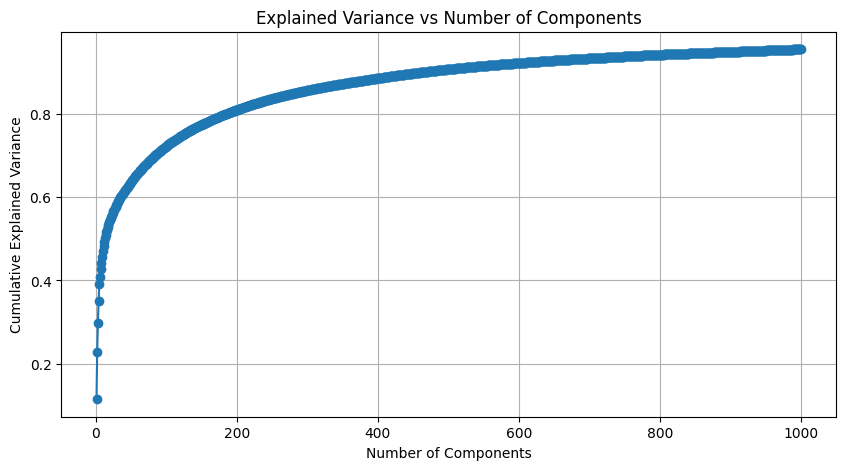

Number of components to explain 90.0% variance: 462


In [437]:
# Initialize TruncatedSVD with a large number of components
svd = TruncatedSVD(n_components=1000)  # You can start with 100 components

# Fit SVD to the data
svd.fit(pivot_table_countplay)

# Explained variance
explained_variance = svd.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.show()

# Choose the number of components such that a desired amount of variance is explained
desired_variance_explained = 0.90
n_components = np.argmax(cumulative_explained_variance >= desired_variance_explained) + 1
print(f"Number of components to explain {desired_variance_explained*100}% variance: {n_components}")


In [438]:
# Apply TruncatedSVD
svd1 = TruncatedSVD(n_components=1000)  # You can choose the number of components
matrix_svd = svd1.fit_transform(pivot_table_countplay)

# Reconstruction
matrix_reconstruct = np.dot(matrix_svd, svd1.components_)

# Converting the matrix into data_frame for better representation
df_reconstructed = pd.DataFrame(matrix_reconstruct,index=pivot_table_countplay.index, columns=pivot_table_countplay.columns)

In [425]:
df_reconstructed.head()

track_numerical_id,0,1,2,3,4,5,6,7,8,9,...,5038,5039,5040,5041,5042,5043,5044,5045,5046,5047
user_numerical_id,,,,,,,,,,,,,,,,,,,,,
0,4.999787e+00,-2.542590e-07,-2.984552e-12,-3.513102e-06,2.008624e-07,9.002749e-08,1.841426e-07,4.318879e-07,1.853377e-09,1.637074e-11,...,-4.621123e-07,5.843551e-11,-2.617499e-05,4.015057e-11,-3.506256e-11,-5.801848e-04,3.901223e-11,3.144264e-11,-3.319557e-11,-5.720764e-06
1,-5.085180e-08,4.160583e-04,-3.299125e-13,-4.415309e-06,6.323022e-11,5.712722e-09,7.317708e-10,-3.639060e-08,-1.691444e-11,5.865477e-13,...,-9.097943e-09,-3.111342e-13,3.386579e-08,-1.285296e-13,-1.272995e-13,-1.044065e-06,-5.221302e-13,1.631541e-13,1.689967e-13,9.055782e-08
2,-5.969104e-13,-3.299125e-13,4.402736e-17,-4.723528e-11,-6.865423e-15,-9.117591e-14,7.321838e-14,2.270965e-13,-1.126269e-16,-3.605375e-18,...,2.899336e-13,5.905743e-18,-3.519141e-12,-7.364753e-18,1.972342e-18,7.002252e-11,1.034752e-17,-6.652857e-18,-1.579008e-18,5.059321e-12
3,-2.107861e-06,-1.324593e-05,-1.417058e-10,2.995193e+00,-3.241663e-07,8.274846e-08,-2.580039e-07,1.427975e-05,-7.403018e-09,-2.463632e-10,...,1.760133e-06,1.400143e-10,1.072841e-04,3.215961e-11,1.312840e-10,1.496674e-04,-1.220711e-11,-1.149474e-10,-3.789363e-12,-3.047082e-05
4,8.034497e-08,1.264604e-10,-1.373085e-14,-2.161109e-07,1.381721e-09,-2.592741e-10,-5.800113e-10,3.648368e-09,-1.922984e-12,-2.554088e-14,...,-1.644998e-09,-3.954341e-14,1.775223e-08,-1.984913e-14,-8.658899e-14,4.541269e-07,-9.118950e-14,-5.675893e-14,1.697296e-14,4.303874e-09


In [551]:
# Now lets take random user and make recommendation for him 
# first we need to take the top 200 songs that this user might repeat we will get this information from the reconstructed matrix

random_idx = np.random.randint(0, len(df_reconstructed))
random_user = df_reconstructed.iloc[random_idx]

random_user.head(5)

track_numerical_id
0    3.531441e-06
1    8.891776e-13
2   -4.617372e-09
3   -1.993312e-05
4    4.378444e-07
Name: 5191, dtype: float64

In [552]:
# Here we have got the ids of the songs that the user have listened to and the user id and the user numeric id
listened_songs_for_choosen_user = user_history_df_sample[user_history_df_sample['user_numerical_id'] == random_idx]['track_id'].to_list()
random_user_id = user_history_df_sample[user_history_df_sample['user_numerical_id'] == random_idx]['user_id'].values[0]
random_user_id_num = random_idx
listened_songs_for_choosen_user, random_user_id, random_user_id_num

(['TRFFTKR12903CE3144'], '1f1946d2f84ccd8ffe72bac015b762751fbcd9ef', 5191)

In [553]:
# Here we have obtained the top 200 songs that the user might repreat if we recommend them to him including the songs that he/she already listened to
top_200_may_be_repeated_songs_numerical_id = random_user.sort_values(ascending=False).index[:200]

top_200_may_be_repeated_songs_id = user_history_df_sample[user_history_df_sample['track_numerical_id'].isin(top_200_may_be_repeated_songs_numerical_id.to_list())].drop_duplicates(['track_id'])
random_user_unlistened_songs_200 = top_200_may_be_repeated_songs_id[~ top_200_may_be_repeated_songs_id['track_id'].isin(listened_songs_for_choosen_user)]['track_id'].to_list()


In [544]:
len(random_user_unlistened_songs_200)

200

## 3.Recommendation section upon the cosine similarity between the user history playlist and the undiscovered songs for the same user
- **3.1 define a function `get_total_feature_verctor_for_user(total_feature_df,user_history_track_ids)`**
- **3.2 define a function `get_feature_vector_for_each_predicted_track(total_feature_df, top_predicted_tracks_from_SVD)`**
- **3.3 define a function `get cosine_similarity_history_predicted_songs(user_total_feature_vect, history_feature_vector)`

In [545]:
# 3.1 define a function get_total_feature_verctor_for_user(total_feature_df, user_history_track_ids)
def get_total_feature_vector_user(total_feature_df, user_history_track_id):
    user_history_feature_vector = total_feature_df[total_feature_df['id'].isin(user_history_track_id)]
    return pd.DataFrame(user_history_feature_vector.sum(axis = 0)).T

In [546]:
#3.2 define a function get_feature_vector_for_each_predicted_track(total_feature_df, top_predicted_tracks_from_SVD)
def get_feature_vector_for_each_predicted_track(total_feature_df, top_predicted_tracks_from_SVD):
    
    playlist_feature_vector = total_feature_df[total_feature_df['id'].isin(top_predicted_tracks_from_SVD)]
    
    return playlist_feature_vector

In [554]:
user_history_feature_vector = get_total_feature_vector_user(song_featues_df, listened_songs_for_choosen_user)

user_history_feature_vector

,genre|00s,genre|60s,genre|70s,genre|80s,genre|90s,genre|acoustic,genre|alternative,genre|alternative_rock,genre|ambient,genre|american,...,year|2013,year|2014,year|2015,year|2016,year|2017,year|2018,year|2019,year|2020,year|2022,id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TRFFTKR12903CE3144


In [555]:
playlist_feature_vector = get_feature_vector_for_each_predicted_track(song_featues_df, random_user_unlistened_songs_200)

playlist_feature_vector

,genre|00s,genre|60s,genre|70s,genre|80s,genre|90s,genre|acoustic,genre|alternative,genre|alternative_rock,genre|ambient,genre|american,...,year|2013,year|2014,year|2015,year|2016,year|2017,year|2018,year|2019,year|2020,year|2022,id
180,0.000000,0.0,0.0,0.000000,0.475039,0.0,0.353361,0.400990,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TRFXBVX128F4265DC7
295,0.459155,0.0,0.0,0.000000,0.000000,0.0,0.326132,0.370090,0.0,0.482714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TRUQEKG128F9310309
469,0.373015,0.0,0.0,0.000000,0.000000,0.0,0.264948,0.300659,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TRZCIWG128F4248B25
511,0.000000,0.0,0.0,0.419533,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TRAFMVN128F147CBCE
591,0.420597,0.0,0.0,0.000000,0.000000,0.0,0.298745,0.339011,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TRRIHBF128F428192D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47293,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TRVYXVP128F930056E
49169,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TRIRKQJ128F14A9870
49855,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TRPUCIV128F425F116
50135,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.362253,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TRGDCAT12903D05D17


In [549]:
def gerenrate_playlist_recos(user_history_feature_vector, playlist_feature_vector, songs_content_df):
    songs_in_playlist = songs_content_df[songs_content_df['track_id'].isin(playlist_feature_vector['id'])]

    songs_in_playlist.loc[songs_in_playlist.index,['sim']] = cosine_similarity(playlist_feature_vector.drop(['id'], axis = 1), user_history_feature_vector.drop(['id'], axis = 1))

    non_playlist_df_top_40 = songs_in_playlist.sort_values('sim',ascending = False).head(40)
    
    return non_playlist_df_top_40['name'].to_list()

In [556]:
non_playlist_df_top_40 = gerenrate_playlist_recos(user_history_feature_vector, playlist_feature_vector, songs_content_df)
non_playlist_df_top_40

['A Kiss Before I Go',
 'Red Dirt Road',
 'Hot Rod Heart',
 'The Man I Want To Be',
 'Cha Cha',
 'All of the Champs That Ever Lived',
 'Felicidad',
 'O Green World',
 'Tripled Manic State',
 'International Dateline',
 'Bebot',
 'Tear You Apart',
 'In Too Far',
 'Food In The Belly',
 'Through The Iris',
 'Je pense à toi',
 'Goodnight and Go',
 'Major Label Debut',
 'Crown of Love',
 'So Here We Are',
 'X & Y',
 'Losing My Edge',
 "Molly's Chambers",
 'Cum Undun',
 'Back Here',
 'Rage!',
 "Now I'm A Fool",
 'If I Never See Your Face Again',
 'Casanova, Baby!',
 'Last Day of Magic',
 'We Have Love',
 'And She Was',
 "Don't Stay Home",
 'Chaplin',
 'Strand Tylösand',
 'DVNO',
 'Ponderosa',
 "Let's Get Back",
 'Girlfriend Is Better',
 "Röyksopp's Night Out"]